<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/March/03.14/SEN/DataAugmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O minion.webp https://cdn.pixabay.com/photo/2018/03/21/02/54/toy-3245426__340.jpg

--2023-03-15 03:36:47--  https://cdn.pixabay.com/photo/2018/03/21/02/54/toy-3245426__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.14.16, 104.18.15.16, 2606:4700::6812:e10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.14.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26126 (26K) [binary/octet-stream]
Saving to: ‘minion.webp’

minion.webp         100%[===================>]  25.51K  --.-KB/s    in 0.001s  

2023-03-15 03:36:47 (47.2 MB/s) - ‘minion.webp’ saved [26126/26126]



In [4]:
image_org = load_img("minion.webp")
image = img_to_array(image_org)
image.shape  # height, width, depth

(340, 510, 3)

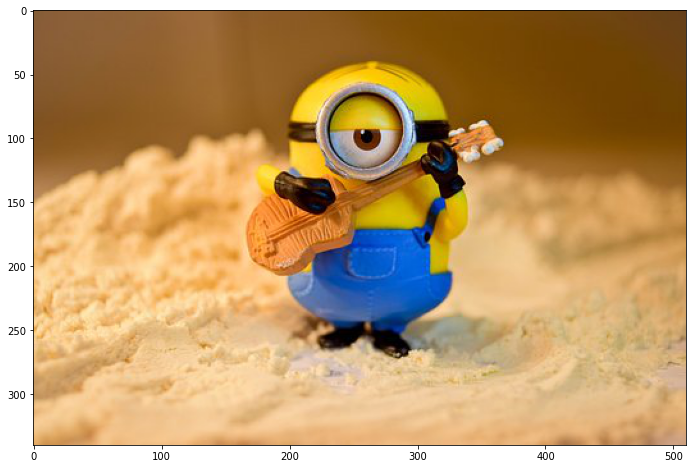

In [5]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [6]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가
image.shape

(1, 340, 510, 3)

### ImageDataGeneration

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.5,         # 확대/축소 범위
                         shear_range=0.5,        # 비스듬히 늘림
                        #  horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [9]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [10]:
!mkdir output

In [11]:
!ls output

In [12]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [13]:
!ls output

image_0_1577.jpg  image_0_3077.jpg  image_0_498.jpg   image_0_753.jpg
image_0_2033.jpg  image_0_3885.jpg  image_0_5060.jpg  image_0_7542.jpg
image_0_2274.jpg  image_0_3916.jpg  image_0_5834.jpg  image_0_7964.jpg
image_0_2314.jpg  image_0_4583.jpg  image_0_6417.jpg  image_0_8315.jpg
image_0_2529.jpg  image_0_4670.jpg  image_0_6869.jpg  image_0_9932.jpg


In [14]:
import os

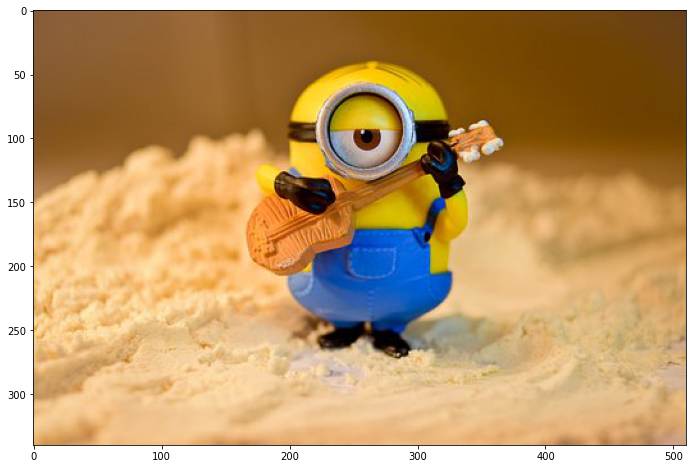

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(image_org)
plt.show()

In [16]:
os.listdir('output')

['image_0_1577.jpg',
 'image_0_7542.jpg',
 'image_0_4583.jpg',
 'image_0_9932.jpg',
 'image_0_5834.jpg',
 'image_0_3885.jpg',
 'image_0_6869.jpg',
 'image_0_4670.jpg',
 'image_0_5060.jpg',
 'image_0_2274.jpg',
 'image_0_3077.jpg',
 'image_0_7964.jpg',
 'image_0_2314.jpg',
 'image_0_6417.jpg',
 'image_0_498.jpg',
 'image_0_8315.jpg',
 'image_0_753.jpg',
 'image_0_2033.jpg',
 'image_0_2529.jpg',
 'image_0_3916.jpg']

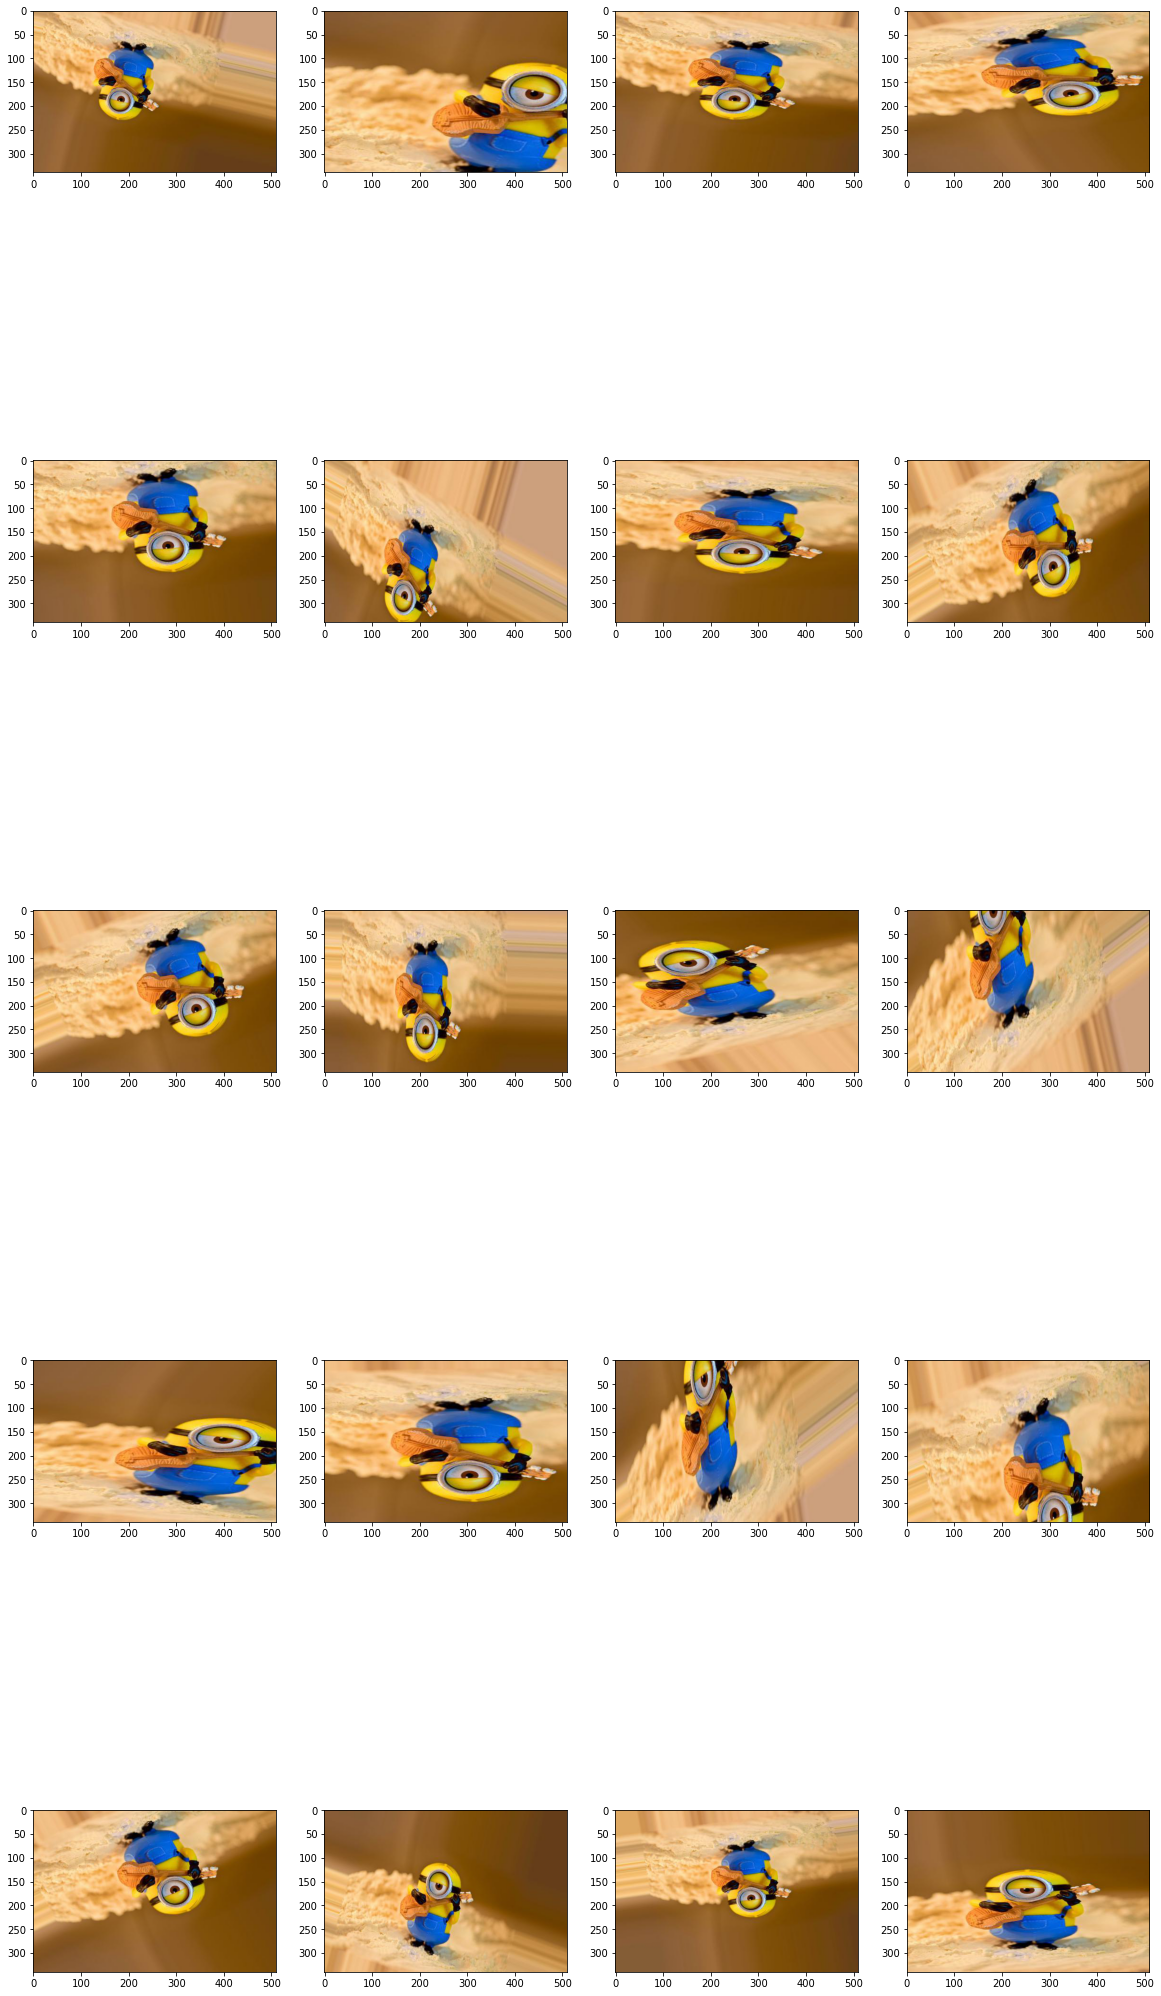

In [17]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)